# **Three Pre-Trained Models Used**


1.   VGG16
2.   ResNet50
3.   InceptionV3


This notebook creates, trains and evaluates an ensemble model using three pre-trained models, that reads facial expressions

# **Upload and extract CK+ dataset into Collab**

In [1]:
# Get zip from PC
from google.colab import files
uploaded = files.upload()

Saving CK+spl.zip to CK+spl.zip


In [2]:
# Extract ZIP file
import zipfile
import os

# Path to the uploaded ZIP file
zip_file_path = '/content/CK+spl.zip'
extract_folder = '/content/'      # Destination folder

# Create a directory to extract files
os.makedirs(extract_folder, exist_ok=True)

# Extract ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

# Verify extraction
print("Files extracted:")
print(os.listdir(extract_folder))

Files extracted:
['.config', 'CK+spl.zip', 'Training', 'Validation', 'sample_data']


# **Load Pre-trained models**



In [ ]:
from tensorflow.keras.applications import VGG16, ResNet50, InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Load Pre-trained Models
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model2 = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model3 = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# **Freeze the Base Layers**

In [ ]:
for layer in base_model1.layers:
    layer.trainable = False

for layer in base_model2.layers:
    layer.trainable = False

for layer in base_model3.layers:
    layer.trainable = False

# **Modify the models by adding new layers for facial expression recognition**

In [ ]:
def add_new_layers(base_model):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    # Assuming 7 classes for facial expressions (e.g., happy, sad, angry, etc.)
    predictions = Dense(7, activation='softmax')(x)
    return Model(inputs=base_model.input, outputs=predictions)

# Create modified models for facial expression recognition
model1 = add_new_layers(base_model1)
model2 = add_new_layers(base_model2)
model3 = add_new_layers(base_model3)

# Compile the Modified Models
model1.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model2.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
model3.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

# **Preprocess CK+ data**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Path to the dataset
train_dir = '/content/Training'
val_dir = '/content/Validation'

# Image data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

Found 784 images belonging to 7 classes.
Found 197 images belonging to 7 classes.


# **Train the models! :D**

In [ ]:
history1 = model1.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32)
history2 = model2.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32)
history3 = model3.fit(train_generator, validation_data=val_generator, epochs=10, batch_size=32)


model1.save('model1.h5')
model2.save('model2.h5')
model3.save('model3.h5')

files.download('model1.h5')
files.download('model2.h5')
files.download('model3.h5')

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 620s 25s/step - accuracy: 0.0731 - loss: 2.2808 - val_accuracy: 0.0761 - val_loss: 2.2446
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 616s 25s/step - accuracy: 0.0607 - loss: 2.2208 - val_accuracy: 0.0761 - val_loss: 2.2024
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 633s 25s/step - accuracy: 0.0893 - loss: 2.1649 - val_accuracy: 0.0761 - val_loss: 2.1632
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 636s 26s/step - accuracy: 0.0637 - loss: 2.1442 - val_accuracy: 0.0761 - val_loss: 2.1270
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 615s 25s/step - accuracy: 0.0815 - loss: 2.0961 - val_accuracy: 0.0761 - val_loss: 2.0948
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 608s 24s/step - accuracy: 0.0904 - loss: 2.0386 - val_accuracy: 0.0761 - val_loss: 2.0656
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 631s 25s/step - accuracy: 0.0859 - loss: 2.0317 - val_accuracy: 0.0761 - val_loss: 2.0398
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 660s 24s/step - accuracy: 0.0741 - loss: 2.0032 - val_accuracy: 0.0761 - val_

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Load the models**
Collab auto deletes the work env, so we must save the models locally and then import it again, before making the ensemble predictions.

In [3]:
# Get model from PC
from google.colab import files

uploaded = files.upload()

Saving model1.h5 to model1.h5
Saving model2.h5 to model2.h5
Saving model3.h5 to model3.h5


In [2]:
# Load models
from tensorflow.keras.models import load_model

model1 = load_model('/content/model1.h5')
model2 = load_model('/content/model2.h5')
model3 = load_model('/content/model3.h5')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Load dataset so it is similar to how it was before training
# Path to the dataset
test_dir = '/content/Training/'

# Image data generator for test data
test_datagen = ImageDataGenerator(rescale=1./255)

# Generator for test data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 784 images belonging to 7 classes.


# **Create ensemble predictions**

In [ ]:
predictions1 = model1.predict(test_generator)
predictions2 = model2.predict(test_generator)
predictions3 = model3.predict(test_generator)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 3/25 ━━━━━━━━━━━━━━━━━━━━ 7:22 20s/step

In [ ]:
# Average the predictions to create an ensemble
ensemble_predictions = (predictions1 + predictions2 + predictions3) / 3
print(ensemble_predictions)

[[0.16935939 0.08973428 0.1668361  ... 0.15232112 0.11053298 0.1883529 ]
 [0.18469612 0.08727866 0.16993444 ... 0.15880261 0.10117114 0.174619  ]
 [0.18924695 0.08190671 0.17091691 ... 0.15868844 0.09713349 0.18419762]
 ...
 [0.11203877 0.07777651 0.1376845  ... 0.13701524 0.09425112 0.3339912 ]
 [0.10850164 0.08034126 0.14296623 ... 0.14371787 0.08968264 0.32255232]
 [0.11024936 0.08156922 0.14090441 ... 0.14577933 0.0902662  0.3202964 ]]


In [ ]:

from sklearn.metrics import accuracy_score

true_labels = test_generator.classes
ensemble_preds_labels = np.argmax(ensemble_predictions, axis=1)
ensemble_accuracy = accuracy_score(true_labels, ensemble_preds_labels)
print(f'Ensemble Model Accuracy: {ensemble_accuracy}')

Ensemble Model Accuracy: 0.34183673469387754


# **Create ensemble model**

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Layer

# Ensure that the layers of the pre-trained models are not trainable
model1.trainable = False
model2.trainable = False
model3.trainable = False

# Define a custom layer to average the outputs
class EnsembleLayer(Layer):
    def __init__(self, **kwargs):
        super(EnsembleLayer, self).__init__(**kwargs)

    def call(self, inputs):
        # Ensure inputs is a list of tensors
        return tf.reduce_mean(inputs, axis=0)  # Averaging over the first dimension which is the batch dimension

# Create a new model input
input_shape = model1.input_shape[1:]  # Assumes all models have the same input shape
model_input = Input(shape=input_shape)

# Get outputs from each model
output1 = model1(model_input)
output2 = model2(model_input)
output3 = model3(model_input)

# Average the outputs using the custom EnsembleLayer
ensemble_output = EnsembleLayer()([output1, output2, output3])

# Create the ensemble model
ensemble_model = Model(inputs=model_input, outputs=ensemble_output)


# Save the model
ensemble_model.save('ensemble_model.h5')


# **Build Gradio App**

In [12]:
# Install required libraries
! pip install gradio matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.5/12.5 MB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.6/318.6 kB 19.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.6 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing i

In [14]:
import os

# Get 'order' of emotions
dataset_folder='/content/Training/'
sub_folders=os.listdir(dataset_folder)

sub_folders
print(sub_folders)

['happy', 'anger', 'sadness', 'fear', 'surprise', 'contempt', 'disgust']


In [ ]:
from PIL import Image
import numpy as np
import gradio as gr
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import io

# Load your models
model1 = load_model('/content/model1.h5')
model2 = load_model('/content/model2.h5')
model3 = load_model('/content/model3.h5')

# Define the class names for the 7 facial expressions (paste in output of previous cell into list contents)
class_names = ['happy', 'anger', 'sadness', 'fear', 'surprise', 'contempt', 'disgust']

# Define a function to make predictions and plot results
def predict_and_plot(image):
    try:
        # Ensure the image is in RGB
        if image.mode != 'RGB':
            image = image.convert('RGB')

        # Preprocess the image for prediction
        image_resized = image.resize((224, 224))  # Resize to the expected input size for the models
        image_array = img_to_array(image_resized) / 255.0  # Normalize image
        image_batch = np.expand_dims(image_array, axis=0)  # Add batch dimension

        # Make predictions with each model
        predictions1 = model1.predict(image_batch)
        predictions2 = model2.predict(image_batch)
        predictions3 = model3.predict(image_batch)

        # Average the predictions for ensemble prediction
        ensemble_predictions = (predictions1 + predictions2 + predictions3) / 3
        ensemble_predictions = ensemble_predictions.flatten()

        # Create a bar plot
        fig, ax = plt.subplots()
        ax.barh(class_names, ensemble_predictions, color='skyblue')
        ax.set_xlim(0, 1)
        ax.set_xlabel('Probability')
        ax.set_title('Facial Expression Prediction')

        # Convert plot to an image
        buf = io.BytesIO()
        plt.savefig(buf, format='png')
        buf.seek(0)
        plt.close(fig)

        # Convert BytesIO to PIL Image
        plot_image = Image.open(buf)

        # Return the image and predictions
        return {class_names[i]: float(ensemble_predictions[i]) for i in range(len(class_names))}, plot_image

    except Exception as e:
        print(f"An error occurred: {e}")
        return {class_name: 0.0 for class_name in class_names}, None

# Create the Gradio interface
interface = gr.Interface(
    fn=predict_and_plot,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Label(num_top_classes=7), gr.Image(type="pil")],
    title="Facial Expression Recognition",
    live=True
)

# Launch the Gradio app
interface.launch(debug = True)


Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://121ed1ac8578bfda4a.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
An error occurred: 'NoneType' object has no attribute 'mode'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
An error occurred: 'NoneType' object has no attribute 'mode'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 577ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
An error occurred: 'NoneType' object has no attribute 'mode'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 988ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step
An error occurred: 'NoneType' object has no attribute 'mode'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
An error occurred: 'NoneType' object has no attribute 'mode'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 562ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 224ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
An er

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
{'happy': 0.19320769608020782, 'fear': 0.08746010810136795, 'contempt': 0.18869780004024506, 'anger': 0.10114073753356934, 'sadness': 0.14772267639636993, 'disgust': 0.09997858852148056, 'surprise': 0.18179236352443695}


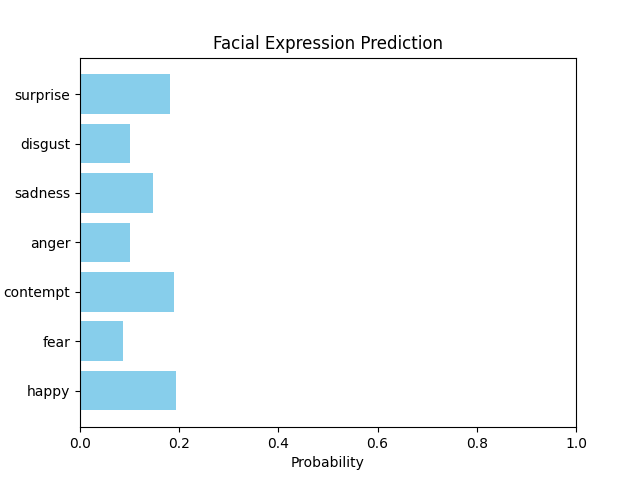

In [ ]:
from PIL import Image

# Load an example image
test_image_path = '/content/Training/anger/S037_003_00000020.png'
test_image = Image.open(test_image_path)


# Run your function directly
predictions, plot_buf = predict_and_plot(test_image)

# Print the predictions to see what they look like
print(predictions)

# If plot_buf is not None, display the plot
if plot_buf:
    from IPython.display import display
    from PIL import Image
    display(Image.open(plot_buf))